<a href="https://colab.research.google.com/github/tejaswini1968/SENTIMENT-ANALYSIS/blob/main/project_sentiment_analysis_logistic_regression_final_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT - SENTIMENT ANALYSIS ON AMAZON PRODUCT REVIEWS USING MACHINE LEARNING ALGORITHMS

# sample size 50,919 - positve,negative are 23030 each,neutral 4859

### Importing Necessary Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the Amazon Reviews data into jupyter notebook using pandas library

In [ ]:
df1 = pd.read_csv('Amazon_Unlocked_Mobile-csv.csv')
df1.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


### Renaming the column names with underscore character

In [ ]:
df1.rename(columns={'Product Name':'Product_Name','Brand Name':'Brand_Name','Review Votes':'Review_Votes'},inplace=True)
df1.head()

,Product_Name,Brand_Name,Price,Rating,Reviews,Review_Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


### Slicing the data based on number of Review votes greater than or equal to 2 - out of total 4,13,840 samples , 66,171 selected

In [ ]:
df2 = df1.loc[df1.Review_Votes >= 2]
df2.shape

(66171, 6)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66171 entries, 12 to 413803
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_Name  66171 non-null  object 
 1   Brand_Name    54811 non-null  object 
 2   Price         65099 non-null  float64
 3   Rating        66171 non-null  int64  
 4   Reviews       66125 non-null  object 
 5   Review_Votes  66171 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ MB


### Dropping the unnecessary columns

In [ ]:
df2.drop(columns=(['Product_Name','Brand_Name','Price','Review_Votes']),inplace=True)
df2.head()

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Rating,Reviews
12,5,These guys are the best! I had a little situat...
16,5,I was able to get the phone I previously owned...
22,1,I purchased this phone in December as a christ...
68,4,"First off, let me say I've been a Nokia user s..."
69,5,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


In [ ]:
df2.shape

(66171, 2)

### Finding the NaN (null) values if any

In [ ]:
df2.isnull().sum()

Rating      0
Reviews    46
dtype: int64

### Dropping the NaN values

In [ ]:
df2.dropna(inplace=True)
df2.shape

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(66125, 2)

### verifying that all the NaN values are dropped

In [ ]:
df2.isnull().sum()

Rating     0
Reviews    0
dtype: int64

### finding the unique values in the Reviews column 

In [ ]:
np.unique(df2.Reviews)

array(["!!!!!Update!!!!! a year later and this phone has some serious problems......the battery life is non-existent I took it off the charger this morning with 100% battery life two hours later it's down to 10% battery life I can power the phone down for about 3 minutes and power it back up and the battery life goes up to about 30% and then 15 minutes after that it's dead. The phone randomly reboots itself several times a day. a couple of days ago I took the back off the phone and all the screws holding the phone together just popped out.. Very poorly put together. the phone seriously lags at times, I've performed a factory reset (that deletes everything) to help improve the speed of the phone but it still runs slow. the camera still works but only if I don't use the Flash. if I use the flash the phone with power off. it was an okay phone when I first brought it, but if you're looking for something long-term this is not the phone. the problems that I wrote about above, probably starte

In [ ]:
df2.head()

,Rating,Reviews
12,5,These guys are the best! I had a little situat...
16,5,I was able to get the phone I previously owned...
22,1,I purchased this phone in December as a christ...
68,4,"First off, let me say I've been a Nokia user s..."
69,5,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


### Resetting the index in the dataframe

In [ ]:
df2.reset_index(drop=True,inplace=True)
df2.head()

,Rating,Reviews
0,5,These guys are the best! I had a little situat...
1,5,I was able to get the phone I previously owned...
2,1,I purchased this phone in December as a christ...
3,4,"First off, let me say I've been a Nokia user s..."
4,5,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


### Original ratings are on the scale of  1,2,3,4,5. We can see the number of each category ratings. 

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

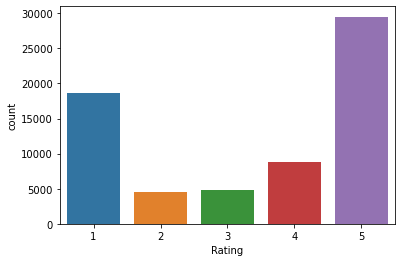

In [ ]:
sns.countplot(df2.Rating)

In [ ]:
df2.head(1)

,Rating,Reviews
0,5,These guys are the best! I had a little situat...


### Project deliverables - positive(2),neutral(1),negative(0) - we have reclassify the ratings of 1 to 5 scale into 0,1,2 categories- 1,2 ratings are negative(0), 3 rating is neutral(1), 4,5 ratings are positive(2)

In [ ]:
def custom_encoder(df):
    df.replace(to_replace=1,value=0,inplace=True)
    df.replace(to_replace=2,value=0,inplace=True)
    df.replace(to_replace=3,value=1,inplace=True)
    df.replace(to_replace=4,value=2,inplace=True)
    df.replace(to_replace=5,value=2,inplace=True)
    

### Calling the function to re-classify the Ratings column

In [ ]:
custom_encoder(df2.Rating)

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df2.head()

,Rating,Reviews
0,2,These guys are the best! I had a little situat...
1,2,I was able to get the phone I previously owned...
2,0,I purchased this phone in December as a christ...
3,2,"First off, let me say I've been a Nokia user s..."
4,2,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


In [ ]:
Amazon_data=df2

In [ ]:
Amazon_data.head()

,Rating,Reviews
0,2,These guys are the best! I had a little situat...
1,2,I was able to get the phone I previously owned...
2,0,I purchased this phone in December as a christ...
3,2,"First off, let me say I've been a Nokia user s..."
4,2,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


### Data is not balanced - positve reviews are 38,236, negative reviews are 23,030, neutral reviews are 4,859

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

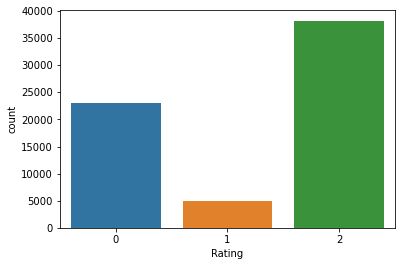

In [ ]:
sns.countplot(Amazon_data.Rating)

In [ ]:
Amazon_data.Rating.value_counts()

2    38236
0    23030
1     4859
Name: Rating, dtype: int64

In [ ]:
Amazon_data_positive = Amazon_data.loc[Amazon_data.Rating == 2]

In [ ]:
Amazon_data_positive.head()

,Rating,Reviews
0,2,These guys are the best! I had a little situat...
1,2,I was able to get the phone I previously owned...
3,2,"First off, let me say I've been a Nokia user s..."
4,2,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...
5,2,This is a solidly-built unlocked phone that is...


In [ ]:
Amazon_data_positive.shape

(38236, 2)

### Balancing the number of positive and negative reviews with equal 23,030 reviews

In [ ]:
Amazon_data_positive = Amazon_data_positive[0:23030]
Amazon_data_positive.shape

(23030, 2)

In [ ]:
Amazon_data_neg = Amazon_data.loc[Amazon_data.Rating == 0]
Amazon_data_neg.shape

(23030, 2)

In [ ]:
Amazon_data_neu = Amazon_data.loc[Amazon_data.Rating == 1]
Amazon_data_neu.shape

(4859, 2)

### Concatinating the three Series objects into single dataframe 

In [ ]:
Amazon_data_final = pd.concat([Amazon_data_positive,Amazon_data_neg,Amazon_data_neu],axis=0)

### Final sample size = 50,919 - after some data wrangling

In [ ]:
Amazon_data_final.shape

(50919, 2)

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

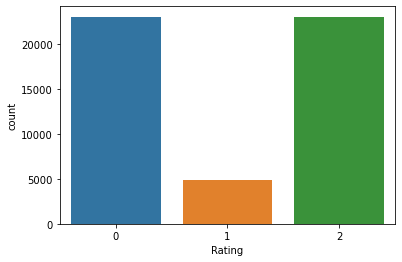

In [ ]:
sns.countplot(Amazon_data_final.Rating)

In [ ]:
Amazon_data_final.Rating.value_counts()

2    23030
0    23030
1     4859
Name: Rating, dtype: int64

In [ ]:
Amazon_data_final.shape

(50919, 2)

### Resetting the index in the dataframe

In [ ]:
Amazon_data_final.reset_index(drop=True,inplace=True)
Amazon_data_final.index

RangeIndex(start=0, stop=50919, step=1)

In [ ]:
Amazon_data_final.head()

,Rating,Reviews
0,2,These guys are the best! I had a little situat...
1,2,I was able to get the phone I previously owned...
2,2,"First off, let me say I've been a Nokia user s..."
3,2,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...
4,2,This is a solidly-built unlocked phone that is...


### Shuffling the data randomly and resetting the index 

In [ ]:
Amazon_data_final = Amazon_data_final.sample(frac=1).reset_index(drop=True)

In [ ]:
Amazon_data_final.head()

,Rating,Reviews
0,0,"I was expecting a 6"" screen and it was 6"". Eve..."
1,0,Used it for few minutes. This happened. I turn...
2,2,Iv had this phone for 1 weeks know and it grea...
3,0,I look for an unlocked iphone and this was not...
4,0,the cell is not unlocked.


In [ ]:
Amazon_data_final.tail()

,Rating,Reviews
50914,2,Perfectly for latin-americans and world-wide t...
50915,2,"It's great, using it now. Love it, when I orde..."
50916,0,THE PHONE IS NOT UNLOCKED AND WILL NOT WORK WI...
50917,0,The phone was great!! For three months... Then...
50918,2,My phone is awesome! I'm on apps 24/7 so the b...


In [ ]:
Amazon_data_final.shape

(50919, 2)

In [ ]:
Amazon_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50919 entries, 0 to 50918
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   50919 non-null  int64 
 1   Reviews  50919 non-null  object
dtypes: int64(1), object(1)
memory usage: 795.7+ KB


### Dataset is ready


### Natural Language Processing(NLP) of the text(Reviews) data using nltk library 

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
pst = PorterStemmer()
from nltk.probability import FreqDist
fdist = FreqDist()


### Tokenization of the text data

In [ ]:
all_tokens = []
for i in range(0,len(Amazon_data_final.Reviews)):
    tokens = word_tokenize(Amazon_data_final.Reviews[i])
    all_tokens.append(tokens)

In [ ]:
type(all_tokens)

list

In [ ]:
len(all_tokens)

50919

In [ ]:
print(all_tokens[0:2])

[['I', 'was', 'expecting', 'a', '6', "''", 'screen', 'and', 'it', 'was', '6', "''", '.', 'Everything', 'else', 'not', 'as', 'expected', 'with', 'this', 'good', 'looking', 'phone', '.'], ['Used', 'it', 'for', 'few', 'minutes', '.', 'This', 'happened', '.', 'I', 'turned', 'the', 'phone', 'off', 'and', 'on', '.', 'Still', 'same', 'thing', '.']]


### Importing Regular Expression library

In [ ]:
import re

### Removing Punctuation marks, special symbols from the text data 

In [ ]:
mid_corpus = []
for i in all_tokens:
    temp_list = []
    for word in i:
        post_punctuation = re.sub('[^a-zA-Z]','',word)
        if len(post_punctuation) > 0:
            temp_list.append(post_punctuation)
    mid_corpus.append(temp_list)

In [ ]:
print(mid_corpus[0:3])

[['I', 'was', 'expecting', 'a', 'screen', 'and', 'it', 'was', 'Everything', 'else', 'not', 'as', 'expected', 'with', 'this', 'good', 'looking', 'phone'], ['Used', 'it', 'for', 'few', 'minutes', 'This', 'happened', 'I', 'turned', 'the', 'phone', 'off', 'and', 'on', 'Still', 'same', 'thing'], ['Iv', 'had', 'this', 'phone', 'for', 'weeks', 'know', 'and', 'it', 'great', 'better', 'then', 'my', 'galaxy', 's', 's', 'love', 'the', 'screen', 'and', 'its', 'fast', 'and', 'easy', 'for', 'me', 'to', 'type', 'on', 'this', 'monster', 'keyboard', 'scenes', 'I', 'have', 'big', 'hands', 'I', 'm', 'on', 'at', 't', 'network', 'through', 'straight', 'talk', 'it', 'was', 'easy', 'to', 'set', 'up', 'the', 'g', 'LTE', 'works', 'great', 'fast', 'been', 'playing', 'some', 'very', 'high', 'quality', 'games', 'and', 'they', 'work', 'perfectly', 'The', 'phones', 'display', 'is', 'very', 'nice', 'beautiful', 'color', 'brightness', 'and', 'responsive', 'Of', 'you', 'have', 'any', 'thing', 'you', 'would', 'like', '

### Converting the text data into lower case

In [ ]:
lower_corpus = []
for i in mid_corpus:
    temp_list1 = []
    for word in i:
        lower_word = word.lower()
        temp_list1.append(lower_word)
    lower_corpus.append(temp_list1)

In [ ]:
print(lower_corpus[0:2])

[['i', 'was', 'expecting', 'a', 'screen', 'and', 'it', 'was', 'everything', 'else', 'not', 'as', 'expected', 'with', 'this', 'good', 'looking', 'phone'], ['used', 'it', 'for', 'few', 'minutes', 'this', 'happened', 'i', 'turned', 'the', 'phone', 'off', 'and', 'on', 'still', 'same', 'thing']]


### Importing Stopwords into a list and removing 'not' from the list

In [ ]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [ ]:
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

### Process of Stemming and removing stopwords from the text data

In [ ]:
final_corpus = []
for i in lower_corpus:
    post_stem = [pst.stem(word) for word in i if not word in set(all_stopwords)]
    post_stem = ' '.join(post_stem)
    final_corpus.append(post_stem)

In [ ]:
type(final_corpus)

list

In [ ]:
len(final_corpus)

50919

### Sample of final processed text data

In [ ]:
final_corpus[0:3]

['expect screen everyth els not expect good look phone',
 'use minut happen turn phone still thing',
 'iv phone week know great better galaxi love screen fast easi type monster keyboard scene big hand network straight talk easi set g lte work great fast play high qualiti game work perfectli phone display nice beauti color bright respons thing would like ask blu studio lte let know u also hit facebook brandon folli']

### printing wordcloud for final_corpus words

In [ ]:
import matplotlib as mpl
from wordcloud import WordCloud

### mpl.rcParams is about the figure size to display our wordcloud 

In [ ]:
mpl.rcParams['figure.figsize'] = 40,12

### we need to collect the content of final_corpus as list of words in variable list_of_words

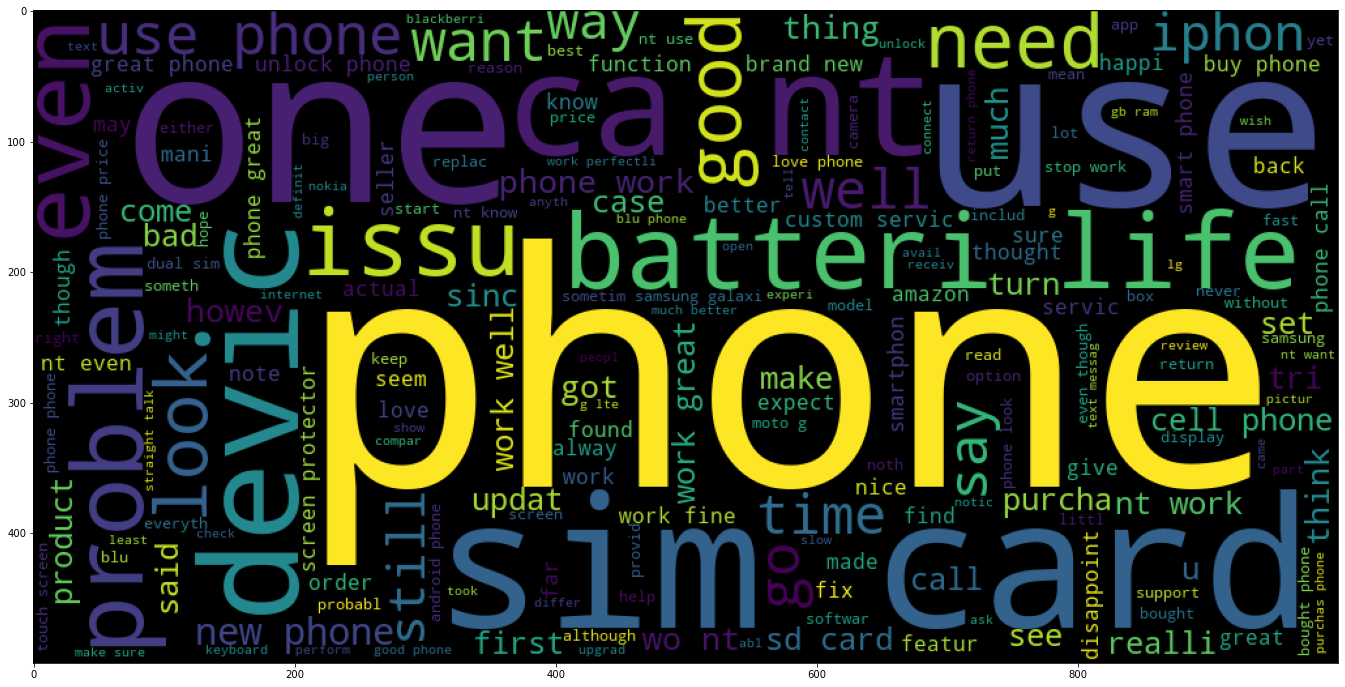

In [ ]:
list_of_words = ''
for i in final_corpus:
    for word in i:
        list_of_words +=' '.join(word)
all_words = WordCloud(width=1000,height=500,background_color='black',min_font_size=10).generate(list_of_words)
plt.imshow(all_words)

### Feature Extraction process from text data - Importing TFIDF Vectorizer from sklearn libray  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
feature_reviews = tfidf.fit_transform(final_corpus)

### Deciding independent(X - feature vector from text data) and dependent(y - Ratings) variables 

In [ ]:
X = feature_reviews
y = Amazon_data_final.Rating

### Train test split in the ratio of 75:25

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Importing the Classifier Algorithm - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

### Fitting the data using Logistic Regression model

In [ ]:
clf = lr.fit(X_train,y_train)

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predicting the sentiment for the test data


In [ ]:
y_pred = lr.predict(X_test)

### Process of Evaluation - Importing Evaluation metrics 

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve
from sklearn.metrics import plot_confusion_matrix,classification_report

### ACCURACY SCORE IS = 89 %

In [ ]:
accuracy_score(y_test,y_pred)

0.8846818538884524

In [ ]:
precision_score(y_test,y_pred,average='weighted')

0.8780650454656866

In [ ]:
recall_score(y_test,y_pred,average='weighted')

0.8846818538884524

In [ ]:
f1_score(y_test,y_pred,average='weighted')

0.870901628290741

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5427,   54,  238],
       [ 494,  374,  353],
       [ 272,   57, 5461]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5719
           1       0.77      0.31      0.44      1221
           2       0.90      0.94      0.92      5790

    accuracy                           0.88     12730
   macro avg       0.85      0.73      0.76     12730
weighted avg       0.88      0.88      0.87     12730



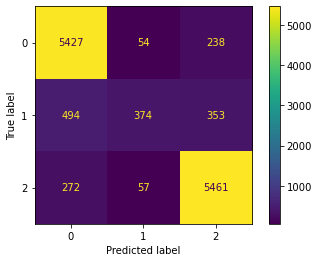

In [ ]:

plot_confusion_matrix(clf,X_test,y_test)

### This is multi class classification(positive, negative, neutral) instead of binary classification. Roc_curve not applicable.

In [ ]:
roc_curve(y_test,y_pred)

ValueError: multiclass format is not supported